In [469]:
from scipy.optimize import minimize
import numpy as np
import random, math
import matplotlib.pyplot as plt

#ret = minimize(objective, start, bounds=B, constraints=XC)
#alpha = ret['x']
#This will find the vector ⃗ which minimizes the function objective within the bounds B and the constraints XC.

Objective: 

![test](objective.png)

Start: A vector of zeros. numpy.zeros(N)

Bounds: (0, C) for each element of A

XC:

![Alt text](10.png)

In [470]:
########## KERNELS ##########
def linearKernel(x, y):
    return np.dot(x, y)

def polynomialKernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def RBFKernel(x, y, sigma=5.0):
    return np.exp(-np.linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

In [471]:
########## PRE-COMPUTED MATRIX P ##########
def precomputedMatrixP(x, t):
    P = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            P[i][j] = t[i]*t[j]*linearKernel(x[i], x[j])
    return P

In [472]:
########## OBJECTIVE FUNCTION ##########
def objective(alpha):
    return ((1/2) * np.dot(np.dot(alpha, P), alpha)) - np.sum(alpha)

In [473]:
########## EQUALITY CONSTRAINT ##########
def zerofun(alpha):
    return np.dot(alpha, t)

In [474]:
########## EXTRACT NON-ZERO ALPHA-VALUES ##########
xNew = []
tNew = []
alphaNew = []
for i in range(len(alpha)):
    if abs(alpha[i]) > 10**(-5):
        xNew.append(x[i])
        tNew.append(t[i])
        alphaNew.append(alpha[i])

In [475]:
########## CALCULATE B ##########
def b():
    b = 0
    for i in range(len(alphaNew)):
        #print(xNew[:][i])
        b += alphaNew[i]*tNew[i]*linearKernel(xNew[0], xNew[i]) 
    b -= tNew[0]
    return b
b = b()


In [476]:
########## INDICATOR FUNCTION ##########
def indicator(x, y):
    val = 0
    for i in range(len(alphaNew)):
        val += alphaNew[i]*tNew[i]*linearKernel(np.array([x, y]), xNew[i])
    val -= b
    if val > 0:
        return 1
    else:
        return -1

In [477]:
np.random.seed(100)

classA = np.concatenate((
        np.random.randn(10, 2) * 0.2 + [1.5, 0.5],
        np.random.randn(10, 2) * 0.2 + [-1.5, 0.5]
    ))
classB = np.random.randn(20, 2) * 0.2 + [0.0, -0.5]

inputs = np.concatenate((classA, classB))
targets = np.concatenate((
        np.ones(classA.shape[0]),
        -np.ones(classB.shape[0])
    ))

C = 100
N = inputs.shape[0]  # Number of rows (samples)
permute = list(range(N))
np.random.shuffle(permute)
inputs = inputs[permute, :]
targets = targets[permute]

P = precomputedMatrixP(inputs, targets)


In [478]:
########## CALL MINIMIZE ##########
ret = minimize(objective, np.zeros(N), bounds=[(0, C) for i in range(N)], constraints={'type':'eq', 'fun':zerofun})
alpha = ret['x']
print(alpha)

ValueError: shapes (40,) and (5,) not aligned: 40 (dim 0) != 5 (dim 0)

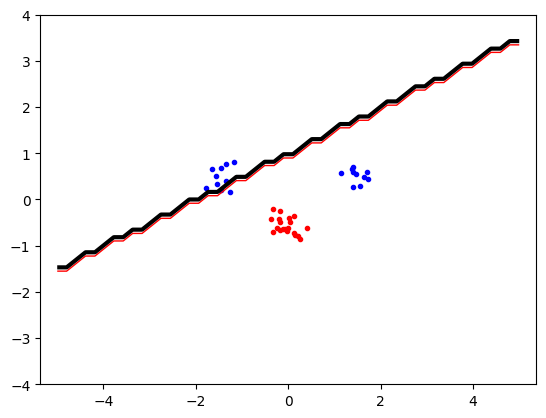

In [ ]:
plt.plot([p[0] for p in classA],
         [p[1] for p in classA],
         'b.')
plt.plot([p[0] for p in classB],
         [p[1] for p in classB],
         'r.')

plt.axis('equal')  # Force same scale on both axes
plt.savefig('svmplot.pdf')  # Save a copy in a file
# plt.show()  # Show the plot on the screen

xgrid = np.linspace(-5, 5)
ygrid = np.linspace(-4, 4)
grid = np.array([[indicator(x, y) 
                  for x in xgrid]
                  for y in ygrid])

plt.contour(xgrid, ygrid, grid,
            (-1.0, 0.0, 1.0),
            colors=('red', 'black', 'blue'), 
            linewidths=(1, 3, 1))
plt.show()
